In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [3]:
train = pd.read_csv('/content/train_ctrUa4K.csv')

In [4]:
train_1 = train.copy()
test_1 = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.drop(('Loan_ID'),axis = 1 , inplace =True)
test.drop(('Loan_ID'),axis =1, inplace =True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
train.shape

(614, 12)

In [11]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test.shape

(367, 11)

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Approval Status')
plt.show()

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box()
plt.show()

From above plot, we can see that the distribution of applicant income is not normally distributed. It is skewed.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box()
plt.show()

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.plot(kind="bar", figsize=(4,4))

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

In [ ]:
Married.div(Married.sum(1).astype(float),axis=0)

In [ ]:

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize = (4,4))
plt.show()

In [ ]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot.bar(stacked=True,figsize = (4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot.bar(stacked=True,figsize = (4,4))
plt.show()

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

There is no visible change in the mean income. So let's construct bins and for the variable applicant income and analyse corresponding loan status of each bin.

In [26]:
train['ApplicantIncome'].max()

81000

In [ ]:
train['ApplicantIncome'].min()

In [28]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [ ]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

It is clear that the income of the Applicant does not affect the chances of loan approval. Now let's examine whether there is any relation with the coapplicant's income and loan approval status.

In [ ]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()
plt.show()

In [ ]:
train['CoapplicantIncome'].max()

In [32]:
bins=[0,1000,5000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

In [ ]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

It demonstrates that the likelihood of a loan acceptance is high if the co-applicant's income is lower. But this doesn't seem right. The most likely explanation for this is that since the majority of applicants do not have any co-applicants, their co-applicant income is zero and does not affect the loan's acceptance. We can create a new variable in which we will combine the income of the applicant and co-applicants in order to see the combined impact of income on loan acceptance

In [34]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [35]:
bins=[0,2500,4000,9000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

In [ ]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

We can observe that compared to applicants with average, high, and very high incomes, the proportion of loans authorised for low total income applicants is significantly lower.

In [ ]:
train['LoanAmount'].max()

In [ ]:
train['LoanAmount'].min()

In [39]:
bins=[0,100,300,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

In [ ]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

It is clear that compared to high loan amounts, the proportion of approved loans is higher for low and average loan amounts.

In [41]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [42]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
test['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [44]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)


In [45]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

Next we have to label encode the target variable

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])


Now, let's look at the correlation between the numericall variables and visualise it.

<ipython-input-47-2f09e20d993c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


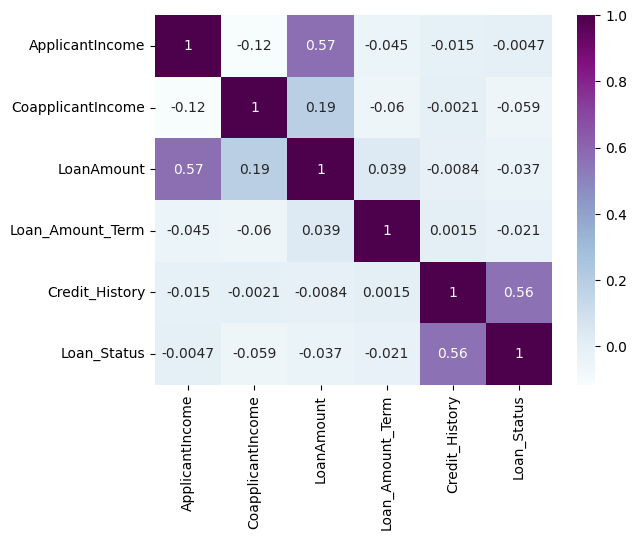

In [47]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix ,annot = True ,cmap='BuPu')
plt.show()

##  Handling missing values

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

Gender, Married, Dependents, Credit_History, and Self_Employed features are all categorical variables. So we can replace them with their mode value.

In [48]:
categorical = ['Gender', 'Married', 'Dependents', 'Credit_History', 'Self_Employed']

In [49]:
for i in categorical:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [50]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Here the value 360 is repeated the most. So we can replace the nan values using the mode of this variable.

In [51]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Next, let's consider loan amount variable. As we have seen before there are outlier values in this variable. So we can replace the nan values with median.

In [52]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [53]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values are filled using mean or median of the corresponding variable. Similarly, we can fill the missiing values in the test dataset.

In [54]:
for i in categorical:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [55]:
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


In [56]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


<ipython-input-58-0cabe34427c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


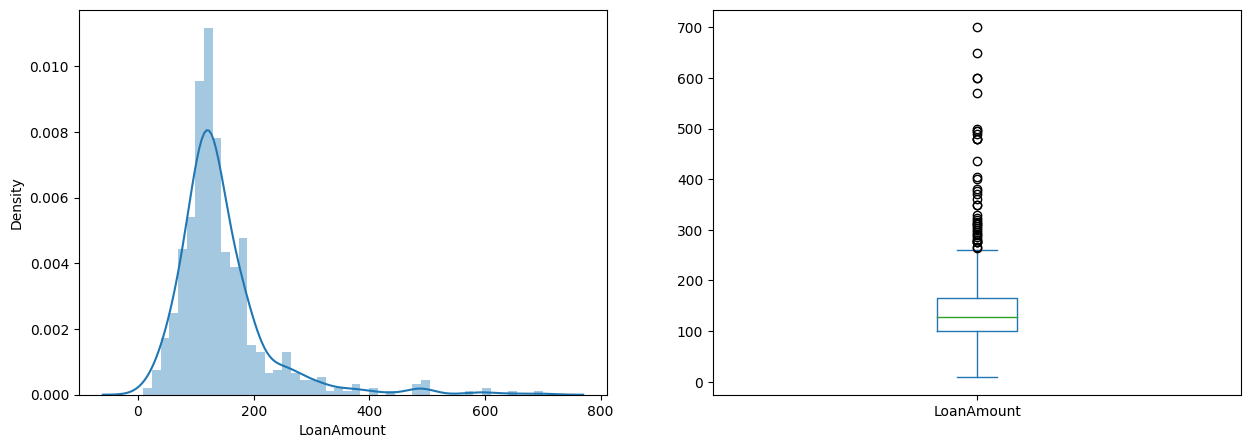

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box()
plt.show()

## Model

In [59]:
x = train.drop('Loan_Status',axis =1)

In [60]:
y = train.Loan_Status

In [61]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [62]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.25)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [65]:
prediction = model.predict(x_cv)

In [66]:
accuracy_score(y_cv,prediction)

0.8246753246753247

In [68]:
pred_test = model.predict(test)

In [70]:
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [72]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_1['Loan_ID']

In [73]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [76]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r"C:\Users\ASUS\OneDrive\Desktop\NIRANJANA\DSA course\Loan prediction\logistic_reg.csv")

## K - Nearest Neighbours

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
metric_k = []
neighbors = np.arange(3,15)

In [79]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_cv)
    acc = accuracy_score(y_cv,y_predictions)
    metric_k.append(acc)

In [80]:
metric_k

[0.6298701298701299,
 0.564935064935065,
 0.6493506493506493,
 0.6103896103896104,
 0.6558441558441559,
 0.6493506493506493,
 0.6493506493506493,
 0.6428571428571429,
 0.6493506493506493,
 0.6688311688311688,
 0.6753246753246753,
 0.6623376623376623]

Text(0, 0.5, 'Accuracy')

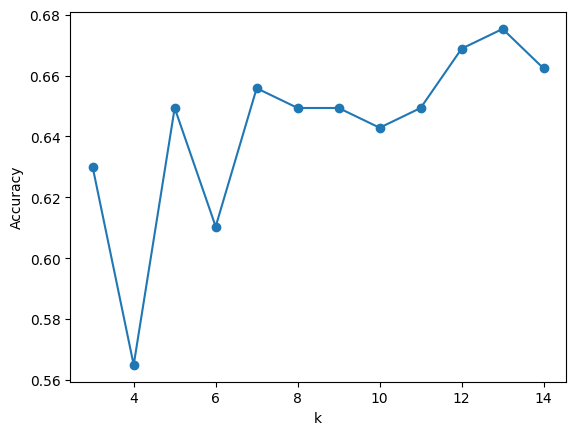

In [81]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')

In [82]:
classifier = KNeighborsClassifier(n_neighbors = 13,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_cv)

In [83]:
print('Accuracy =',accuracy_score(y_cv,y_predictions))

Accuracy = 0.6753246753246753


In [84]:
pred_test = classifier.predict(test)

In [85]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_1['Loan_ID']

In [86]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [87]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r"C:\Users\ASUS\OneDrive\Desktop\NIRANJANA\DSA course\Loan prediction\KNN.csv")


## SVM

In [88]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [89]:
y_pred = svmclf.predict(x_cv)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_cv,y_pred))

Accuracy is 0.8116883116883117


In [91]:
y_pred1 = svmclf.predict(test)

In [92]:
submission['Loan_Status']=y_pred1
submission['Loan_ID']=test_1['Loan_ID']

In [93]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [94]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("Loan prediction_SVM.csv")


## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt_clf =DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred = dt_clf.predict(x_cv)

In [97]:
print('Accuracy is:',accuracy_score(y_cv,y_pred))

Accuracy is: 0.7467532467532467


In [98]:
y_pred = dt_clf.predict(test)

In [99]:
submission['Loan_Status']=y_pred
submission['Loan_ID']=test_1['Loan_ID']

In [100]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [101]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("Loan prediction_Decision Tree.csv")

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10).fit(x_train,y_train)
prediction = rf_classifier.predict(x_cv)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_cv,prediction))
print(accuracy_score(y_cv,prediction))
print(classification_report(y_cv,prediction))

[[24 23]
 [18 89]]
0.7337662337662337
              precision    recall  f1-score   support

           0       0.57      0.51      0.54        47
           1       0.79      0.83      0.81       107

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.73      0.73      0.73       154



In [109]:
prediction = rf_classifier.predict(test)

In [110]:
submission['Loan_Status']=prediction
submission['Loan_ID']=test_1['Loan_ID']

In [111]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [112]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("Loan prediction_Random Forest.csv")
